In [1]:
import site
import pickle as pkl
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy

def siteFG():
    FGPATH = '/home/cosinga/figrid/'
    site.addsitedir(FGPATH)
    return

def trgba(attr, value, alpha = 1.0):
    return mpl.colors.to_rgba(ds.attr_args[attr][value]['color'], alpha)
siteFG()
from figrid.data_sort import DataSort
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'serif'

In [34]:
ds = pkl.load(open('/home/cosinga/hcolor/fig_md_analysis/bias_results.pkl', 'rb'))
print(ds.getAttrs())
XLAB = 'k (cMpc/h)$^{-1}$'
YLAB = 'P$_{%s}$ (k) (cMpc/h)$^{-3}$'
ds.tickArgs({'direction':'in', 'labelsize':12})
ds.legendArgs({'frameon':False, 'loc':'upper right', 'fontsize':12}, slc = (0,0))
ds.rowLabelArgs(pos = [0.05, 0.05], txtkw = {'fontsize':14, 'ha':'left', 'va':'bottom'})
ds.colLabelArgs(pos = [0.5, 0.95], txtkw = {'fontsize':14, 'ha':'center', 'va':'top'})
ds.axisArgs({'xscale':'log', 'yscale':'log', 'xlim':[0.11866199299595938, 20]})
ds.axisLabelArgs('both', {'fontsize':14})
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle'])
ds.displayAs('fieldname', ['hisubhalo', 'vn', 'hiptl', 'ptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle', 'Matter'])
ds.displayAs('snapshot', [99, 67], ['z = 0.0', 'z = 0.5'])
ds.displayAs('color', ['red', 'blue', 'resolved'], ['Red Galaxies', 'Blue Galaxies', 'All Galaxies'])
ds.plotArgs('color', 'red', {'color':'red'})
ds.plotArgs('color', 'blue', {'color':'blue'})
ds.plotArgs('space', 'real', {'color':'green'})
ds.plotArgs('space', 'redshift', {'color':'orange'})
ds.displayAs('censat', ['both', 'centrals', 'satellites'], ['All Galaxies', 'Centrals', 'Satellites'])
ds.plotArgs('censat', 'both', {'color':'gray'})
ds.plotArgs('censat', 'satellites', {'color':'mediumseagreen'})
ds.plotArgs('censat', 'centrals', {'color':'olive'})

['path', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'map', 'model', 'HI_fieldname', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'projection', 'HI_res', 'censat', 'post_process', 'numerator', 'denominator']


# Censat HI Auto

In [51]:
%%capture
ip = {'is_auto':True, 'fieldname':'hisubhalo', 'HI_res':'diemer', 'sim_resolution':'high',
     'grid_resolution':800, 'axis':0, 'path':'censat', 'space':['real', 'redshift']}

fg = ds.figrid('censat', 'space', 'snapshot', ip)

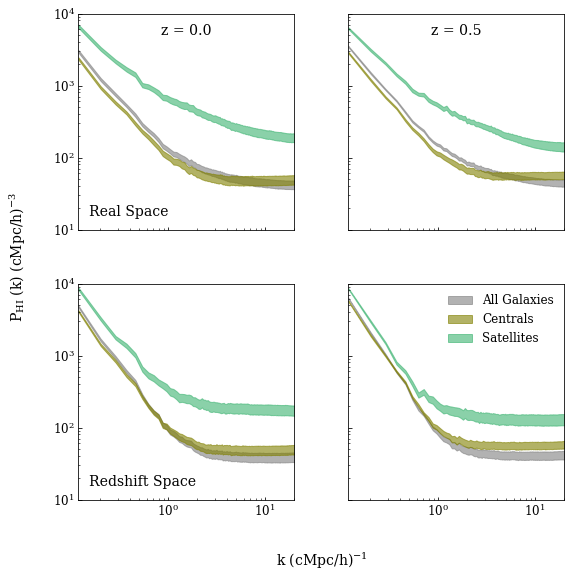

In [52]:
fg.autoFill({'alpha':0.6})
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(10, 1e4)})
fg.legendArgs({}, (1, 1))
fg.setXLabel(XLAB)
fg.setYLabel(YLAB%r'\mathrm{HI}')
fg.plot()
# fg.save("HI_auto_censat_spaceR_snapshotC.png")
fg.fig

The row values for space: ['real', 'redshift']
The column values for censat: ['both', 'centrals', 'satellites']


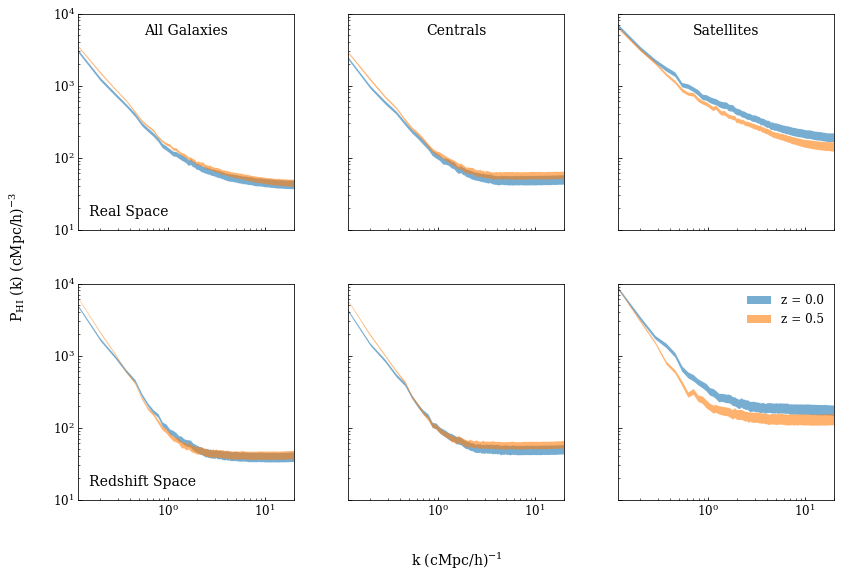

In [55]:
ip['censat'] = ['both', 'centrals', 'satellites']
fg = ds.figrid('snapshot', 'space', 'censat', ip)
fg.autoFill({'alpha':0.6})
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(10, 1e4)})
fg.legendArgs({}, (-1, -1))
fg.setXLabel(XLAB)
fg.setYLabel(YLAB%r'\mathrm{HI}')
fg.plot()
# fg.save('HI_auto_snapshot_spaceR_censatC.png')

The row values for snapshot: [99, 67]
The column values for censat: ['both', 'centrals', 'satellites']


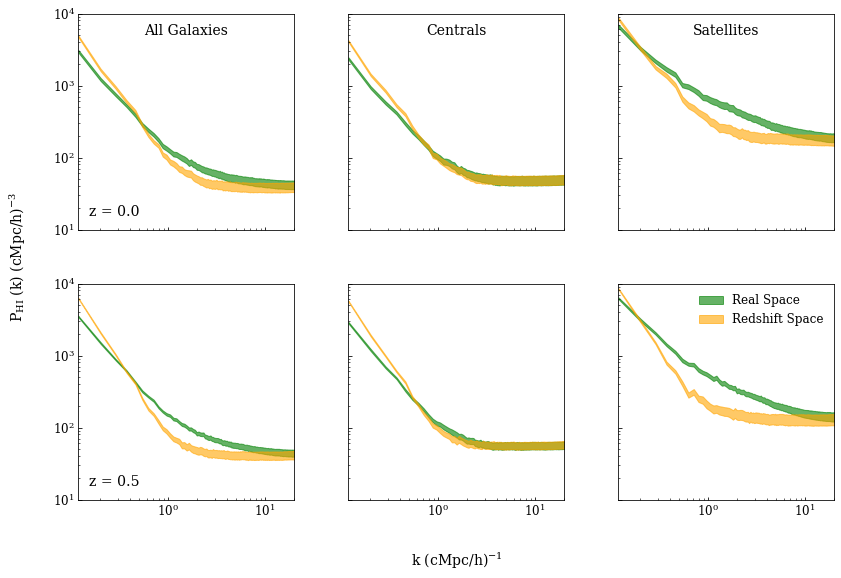

In [56]:
ip['censat'] = ['both', 'centrals', 'satellites']
fg = ds.figrid('space', 'snapshot', 'censat', ip)
fg.autoFill({'alpha':0.6})
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(10, 1e4)})
fg.legendArgs({}, (-1, -1))
fg.setXLabel(XLAB)
fg.setYLabel(YLAB%r'\mathrm{HI}')
fg.plot()
# fg.save('HI_auto_space_snapshotR_censatC.png')

# Censat Galaxy Auto

In [70]:
%%capture
ip = {'is_auto':True, 'path':'censat', 'space':'real', 'color':['red', 'blue', 'resolved']}
fg = ds.figrid('censat', 'color', 'snapshot', ip)

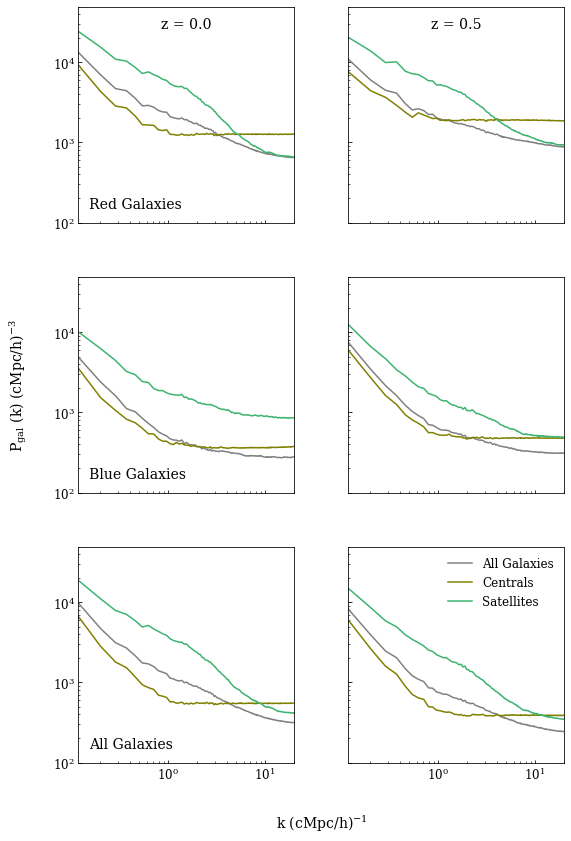

In [71]:
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(1e2, 5e4)})
fg.setXLabel(XLAB)
fg.setYLabel(YLAB%r'\mathrm{gal}')
fg.legendArgs({}, (-1, -1))
fg.plot()
fg.save("galaxy_auto_real_censat_colorR_snapshotC.png")
fg.fig

The row values for censat: ['both', 'centrals', 'satellites']
The column values for snapshot: [99, 67]


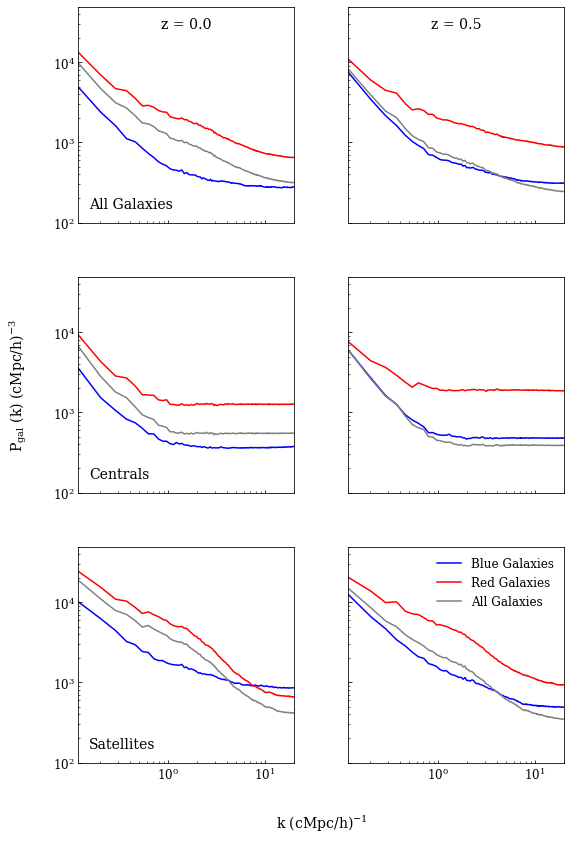

In [72]:
ip = {'is_auto':True, 'path':'censat', 'space':'real', 'color':['red', 'blue', 'resolved'],
     'censat':['both', 'centrals', 'satellites']}
fg = ds.figrid('color', 'censat', 'snapshot', ip)
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(1e2, 5e4)})
fg.setXLabel(XLAB)
fg.plotArgs('resolved', {'color':'gray'})
fg.setYLabel(YLAB%r'\mathrm{gal}')
fg.legendArgs({}, (-1, -1))
fg.plot()
fg.save('galaxy_auto_color_censatR_snapshotC.png')

The row values for censat: ['both', 'centrals', 'satellites']
The column values for color: ['red', 'blue', 'resolved']


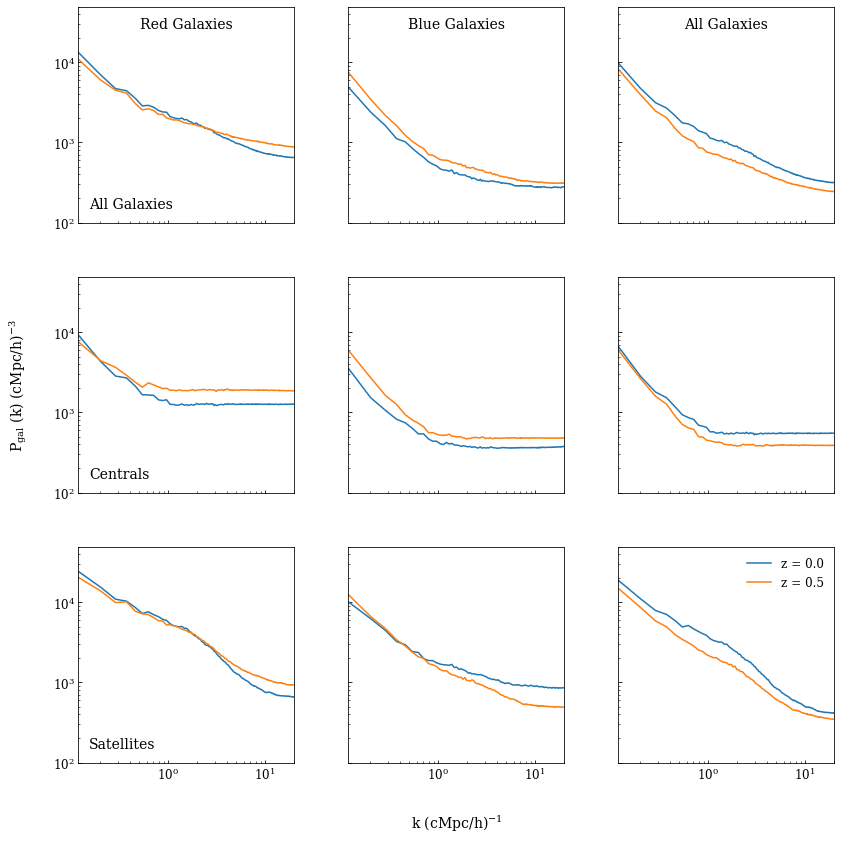

In [73]:
ip = {'is_auto':True, 'path':'censat', 'space':'real', 'color':['red', 'blue', 'resolved'],
     'censat':['both', 'centrals', 'satellites']}
fg = ds.figrid('snapshot', 'censat', 'color', ip)
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(1e2, 5e4)})
fg.setXLabel(XLAB)
fg.plotArgs('resolved', {'color':'gray'})
fg.setYLabel(YLAB%r'\mathrm{gal}')
fg.legendArgs({}, (-1, -1))
fg.plot()
fg.save('galaxy_auto_snapshot_censatR_colorC.png')

# Censat Galaxy-HI X-Power

The row values for color: ['red', 'blue', 'resolved']
The column values for snapshot: [99, 67]


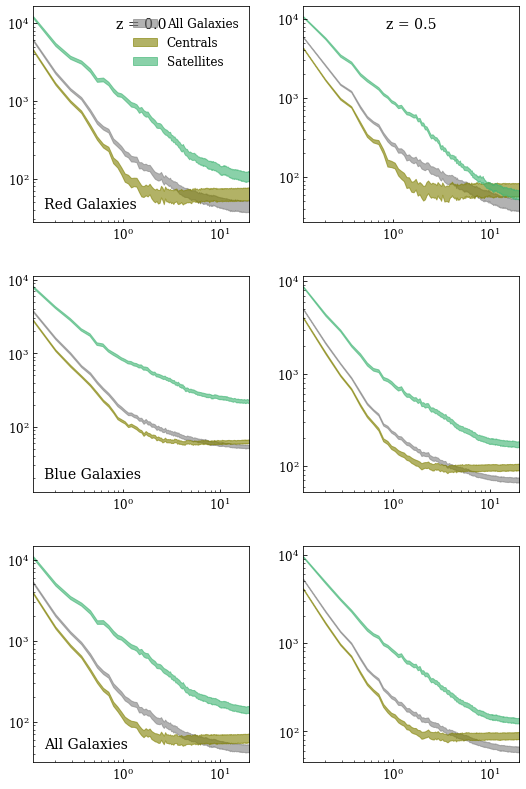

In [74]:
ip = {'is_auto':False, 'path':'censat', 'color':['red', 'blue', 'resolved'], 'fieldname':'hisubhalo_galaxy',
     'space':'real', 'censat':['both', 'centrals', 'satellites']}
fg = ds.figrid('censat', 'color', 'snapshot', ip)
fg.autoFill({'alpha':0.6})
fg.plot()
# ds.printMatching(ip)